# <center>Board Game Review Rating Predictor

Name: Steeven Pereira<br>
ID: 1001759481

<h1>Summary:</h1><br>
Text analysis is an important part of AI technology that uses Natural Language Processing to transform unstructured text into Normalized, Structured data suitable for Machine Learning algorithms. There are a lot of different techniques which can convert raw textual data into meaningfull information by performing certain mathematical computations that convert the text data into numerical data. The aim of this project was to build a prediction model that can effectively predict the rating of a board game review. The rating predictor model was trained on the 'comment' column of the 'bgg-13m-reviews' file. The main challenge of this project was handling the large scale data and creating a prediction model that can be deployed on cloud to provide the predicted output in good time. The textual data was cleaned by removing the 'urls', 'emojis', and other special characters that were redundant for the classification model. Stopwords were also removed from the data. Since the data to be feed to the machine learning model was of string datatype, it had to be converted to a format suitable for the prediction model. Tfid vectorization was used to transform the data. Range Accuracy was also computed with a buffer of 1. The data was trained on four classification algorithms namely: <ul><li>Ridge Classifier</li><li>Multinomial Naive Bayes Classifier</li><li>Linear SVC Classifier</li><li>Ensemble</li></ul><br>
The accuracy obtained in each model: <ul><li>Ridge Classifier: 31.94%</li><li>Multinomial Naive Bayes Classifier: 30.7%</li><li>Linear SVC Classifier: 30.8%</li><li>Ensemble: 31.72%</li></ul><br>
Mean Square Error in each model: <ul><li>Ridge Classifier: 1.65</li><li>Multinomial Naive Bayes Classifier: 1.72</li><li>Linear SVC Classifier: 1.73</li><li>Ensemble: 1.61</li></ul><br>
Time to develop each model: <ul><li>Ridge Classifier: 9min 4s</li><li>Multinomial Naive Bayes Classifier: 1.42s</li><li>Linear SVC Classifier: 2h 19min 55s</li><li>Ensemble: 8min 50s</li></ul><br>
Since some of the models take a lot of time to develop the model it would be difficult to run the model and obtain output on the server. So all the models were saved using joblib and only required to be loaded while predicting a review on the web UI. The web UI was created using Flask and hosted using Heroku.
<br>
<h1>Dataset Description</h1>

The dataset was obtained from BoardGameGeek Reviews on Kaggle. The dataset was created from the data collected from boardgamegeek.com and divided into 3 files. For this project only the 'bgg-13m-reviews' file was used that consists of the 'comment' column and the rating column required for the machine learning model.The dataset consisted of approximately 13.6M data values. However some of the data values in the 'comment' column were empty. Such data values were removed from the dataset and the data was scaled down to approximately 2.6M data values. The dataset was cleaned and transform to create vectors to feed as input to the classifier models. 
<br>
<h1>Aim of the project</h1>

The main aim of the project is to predict the rating of a game review based on the review provided as input. The purpose of this project is handling large scale data and understanding the working of classification algorithms. Also creating a web User Interface and hosting it on cloud. 
<br>
<h2>Ridge Classifier</h2>

Ridge classifier is a classification algorithm that uses ridge regression to classify multi-nomial values. For multi-class classification, n_class classifiers are trained in a one-versus-all approach.
<br>
<h2>Multinomial Naive-Bayes Classifier</h2>

Multinomial Naive-Bayes classifier is a naive bayes classifier for multi-nomial values. It is suitable for multi-class classification with discrete features. The multi-nomial distribution works for fractional count such as tfidf as well.
<br>
<h2>Linear SVC Classifier</h2>

Linear SVC classifier is a Support Vector Machine classifier for multi-nomial values. The objective of a Linear Support Vector Classifier is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. After that getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. 
<br>
<h2>Ensemble</h2>
Ensembel model's are a technique of machine learning in which several machine learning models are combined to create a single classifier model to decrease loss and improve the accuracy of the model. In this project a Voting Classifier is built by combining Ridge Classifier and Multinomial Naive Bayes Classifier.<br>
<h2>TF-IDF Vectorizer</h2>

TF-IDF stands for term frequency inverse document frequency. It transforms text into feature vectors that are provided as input to the classifier model. It is a statistical measure that computes how relevant a particular word is in the document. Tf-idf is calculated by multiplying two values: frequency of a word appearing in a document, and the inverse document frequency of the word across a set of documents. <br>
<br>
<h1><b>Difference from reference</b></h1><br>

https://github.com/vivekk09/Board-Game-Review-Prediction-ML-Project/blob/master/Board%20Game%20Review%20Prediction.ipynb
<br>
In the above reference, the model was created using different attributes that contained different datatypes. For my project I have created the model based on the 'comment' column of the dataset. So in order to pass the input to the model the data had to be transformed. Tf-idf vectorization was used to convert the string data into vecctors maaking it a suitable input for the classifier model. In the references the dataset consisted of 80K reviews and the models used were Linear Regression and Random Forest. Since the dataset for this project was more than 30 times the dataset in the reference using Linear Regression or Random Forest was time-consuming and also the output in this project has multi-nomial values. Thus I have used Ridge Classifier, Multinomial Naive Bayes, Linear SVC and Voting Classifier for creating the model. The challenge in this project was creating the web UI and hosting on the server. Based on the accuracy, range accuracy and mean square error of all the classifier models the web server was designed using the Ridge Classifier. Since it was time consuming to fit the classifier on the web server i used joblib to save the model.
<br>
<h1>Video Link:</h1><br>

[Click Here](https://www.youtube.com/watch?v=NtPtIP394v4)
<br>
<h1>Github:</h1><br>

[Click Here](https://github.com/steeven1001759481/ratingpredictor)
<br>
<h1>Web Demo:</h1><br>

[Click Here](https://ratingprediction.herokuapp.com/)

In [1]:
#Loading the libraries required for loading dataset and visualization 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [60]:
#loading the dataset using pandas library
df = pd.read_csv('bgg-13m-reviews.csv')

In [61]:
#Shuffle the Dataset
df = df.sample(frac=1)
len(df)

13170073

Drop the data values where the 'comment' column is empty. 

In [62]:
df.dropna(subset=['comment'], inplace=True)
len(df)

2637756

<b>Histogram of the rating column that is used as class attribute</b><br>
We can see that almost 700K reviews have 7 rating that is the highest frequency. The cummulative frequency of ratings 1, 2, and 3 is less than 120K. 


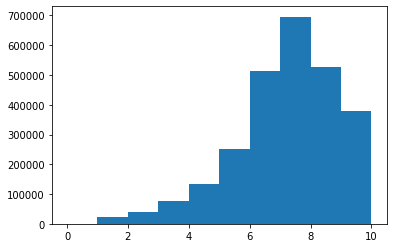

In [76]:
plt.hist(df['rating'])
plt.show()

Cleaning the dataset<br>
<ul>
    <li>removing emoji's</li>
    <li>removing url</li>
    <li>removing special characters</li>
    

In [7]:
import emoji
import re
def clean_data(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    text = re.sub(r'\n',' ', text) 
    text = re.sub('\s+', ' ', text).strip() 
    return emoji_pattern.sub(r'', text)
    return url.sub(r'',text)

In [77]:
df['comment'] = df['comment'].apply(clean_data)

Tf-idf Vectorization and removing stopwords.

In [100]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = feature_extraction.text.TfidfVectorizer(stop_words='english')


Top 15 words before removing stopwords


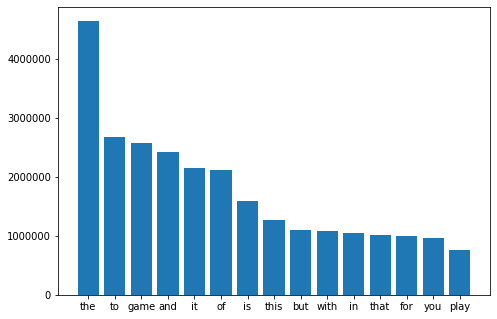

Wall time: 2min 30s


In [157]:
%%time
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment'], 15)

langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()

Top 15 words after removing stopwords

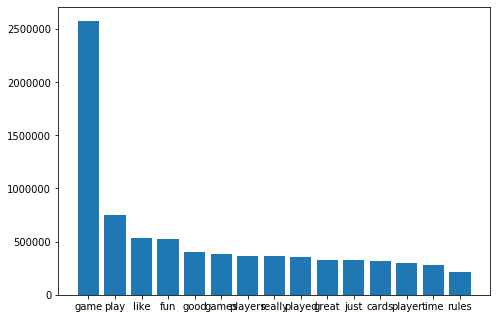

In [158]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment'], 15)
langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()

In [11]:
#Store the review in X and the rating i.e. the class label in y
X = df['comment'].values
y = df['rating'].values

The rating column contains 8202 unique values. It contains float values which will be rounded.

In [3]:
len(df['rating'].unique())

8202

In [58]:
y = np.round(y)
len(df['rating'].unique())

3408

Split the dataset into 80-20 train test split

In [13]:
split_size = 520000
X_train = X[:-split_size]
y_train = y[:-split_size]

X_test = X[-split_size:]
y_test = y[-split_size:]

Create vectors for the train data

In [78]:
train_vectors = count_vectorizer.fit_transform(X_train)

Create vectors for the test data

In [79]:
test_vectors = count_vectorizer.transform(X_test)

# Classifier Model

In [29]:
#Load the required libraries
import sklearn
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [109]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve

In [82]:
def range_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == (predicted[i]+1) or actual[i] == (predicted[i]-1) :
            correct += 1
    return correct / float(len(actual)) * 100.0

<h2>Ridge Classifier</h2>
<br>Fit the Ridge classifier model on the train data    

In [171]:
%%time
clf = RidgeClassifier()
clf.fit(train_vectors, y_train)

Wall time: 9min 4s


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

Predicting the values of the test set

In [19]:
%%time
y_pred = np.round(clf.predict(test_vectors))

Wall time: 237 ms


Accuracy on Ridge Classifier

In [88]:
acc = accuracy_score(np.round(y_pred), np.round(y_test))
print('Accuracy on Ridge Classifier : {} %'.format(acc))

Accuracy on Ridge Classifier : 0.31940576923076924 %


In [89]:
range_ridge_score=range_accuracy_metric(y_test, np.round(y_pred))
print('Range Accuracy on Ridge Classifier : {} %'.format(range_ridge_score))

Range Accuracy on Ridge Classifier : 69.61076923076924 %


Mean Square error on Ridge Classifier

In [49]:
mse1 = mean_squared_error(y_test, y_pred, squared=False)
mse1

1.6457748934772338

In [106]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.35      0.09      0.15      3894
         2.0       0.27      0.05      0.09      8068
         3.0       0.23      0.03      0.05     14004
         4.0       0.23      0.06      0.09     26863
         5.0       0.22      0.05      0.08     43032
         6.0       0.31      0.42      0.35    103534
         7.0       0.30      0.26      0.28    113383
         8.0       0.34      0.63      0.45    129295
         9.0       0.23      0.04      0.06     47515
        10.0       0.35      0.16      0.22     30409

    accuracy                           0.32    520000
   macro avg       0.26      0.16      0.17    520000
weighted avg       0.30      0.32      0.28    520000



<h2>Multinomial Naive Bayes Classifier</h2>
<br>Fit the Multinomial Naive Bayes classifier model on the train data    

In [22]:
%%time
clf2 = MultinomialNB()
clf2.fit(train_vectors, y_train)

Wall time: 1.42 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predicting the values of the test set

In [23]:
%%time
y_pred_nb = np.round(clf2.predict(test_vectors))

Wall time: 215 ms


Accuracy on Multinomial Naive Bayes Classifier

In [90]:
acc2 = accuracy_score(y_pred_nb, np.round(y_test))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(acc2))

Range Accuracy on Multinomial Naive Bayes : 0.30702115384615386 %


In [91]:
range_MNB_score=range_accuracy_metric(y_test, np.round(y_pred_nb))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(range_MNB_score))

Range Accuracy on Multinomial Naive Bayes : 66.69192307692308 %


Mean Square error on Multinomial Naive Bayes Classifier

In [81]:
mse2 = mean_squared_error(y_test, np.round(y_pred_nb), squared=False)
mse2

1.7228805262386326

In [139]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_nb)))

C:\Users\perei\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.14      0.00      0.00      3894
         2.0       0.58      0.00      0.01      8068
         3.0       0.19      0.00      0.00     14004
         4.0       0.22      0.00      0.00     26863
         5.0       0.18      0.00      0.00     43032
         6.0       0.30      0.35      0.32    103534
         7.0       0.30      0.16      0.21    113383
         8.0       0.31      0.82      0.45    129295
         9.0       0.22      0.00      0.01     47515
        10.0       0.40      0.01      0.01     30409

    accuracy                           0.31    520000
   macro avg       0.26      0.12      0.09    520000
weighted avg       0.29      0.31      0.22    520000



<h2>Linear SVC</h2>
<br>Fit the Linear SVC model on the train data    

In [34]:
%%time
clf3 = LinearSVC()
clf3.fit(train_vectors, y_train)

Wall time: 2h 19min 55s


C:\Users\perei\miniconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Predicting the values of the test set

In [36]:
%%time
y_pred_svc = np.round(clf3.predict(test_vectors))

Wall time: 358 ms


Accuracy on Linear SVC

In [168]:
acc3 = accuracy_score(y_pred_svc, np.round(y_test))
print('Range Accuracy on Linear SVC : {} %'.format(acc3))

Range Accuracy on Linear SVC : 0.3086673076923077 %


In [169]:
range_svc_score=range_accuracy_metric(y_test, np.round(y_pred_svc))
print('Range Accuracy on Linear SVC : {} %'.format(range_svc_score))

Range Accuracy on Linear SVC : 67.45692307692308 %


Mean Square error on Linear SVC

In [53]:
mse3 = mean_squared_error(y_test, np.round(y_pred_svc), squared=False)
mse3

1.72678781378783

In [140]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_svc)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.32      0.17      0.22      3894
         2.0       0.27      0.08      0.12      8068
         3.0       0.23      0.03      0.05     14004
         4.0       0.22      0.10      0.14     26863
         5.0       0.23      0.07      0.11     43032
         6.0       0.33      0.23      0.27    103534
         7.0       0.29      0.19      0.23    113383
         8.0       0.31      0.78      0.45    129295
         9.0       0.22      0.04      0.06     47515
        10.0       0.38      0.16      0.23     30409

    accuracy                           0.31    520000
   macro avg       0.26      0.17      0.17    520000
weighted avg       0.29      0.31      0.26    520000



<h2>Voting Classifier</h2>
<br>Fit the ensemble model on the train data    

In [160]:
%%time
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('ridge', clf))
estimators.append(('MNB', clf2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vectors, y_train)

Wall time: 8min 50s


VotingClassifier(estimators=[('ridge',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001)),
                             ('MNB',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

Predicting the values of the test set

In [161]:
y_pred_ensemble = np.round(ensemble.predict(test_vectors))

Accuracy on Ensemble model


In [166]:
acc4 = accuracy_score(y_pred_ensemble, np.round(y_test))
print('Range Accuracy on Ensemble model : {} %'.format(acc4))

Range Accuracy on Ensemble model : 0.3172326923076923 %


In [167]:
range_ensemble_score=range_accuracy_metric(y_test, np.round(y_pred_ensemble))
print('Range Accuracy on Ensemble model : {} %'.format(range_ensemble_score))

Range Accuracy on Ensemble model : 69.51961538461539 %


Mean Square error on Ensemble

In [164]:
mse4 = mean_squared_error(y_test, y_pred_ensemble, squared=False)
mse4

1.6105099526834064

In [172]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_ensemble)))

C:\Users\perei\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.35      0.09      0.15      3894
         2.0       0.26      0.05      0.08      8068
         3.0       0.22      0.03      0.05     14004
         4.0       0.23      0.06      0.09     26863
         5.0       0.22      0.05      0.08     43032
         6.0       0.30      0.44      0.36    103534
         7.0       0.30      0.26      0.28    113383
         8.0       0.34      0.66      0.45    129295
         9.0       0.29      0.00      0.01     47515
        10.0       0.58      0.01      0.01     30409

    accuracy                           0.32    520000
   macro avg       0.28      0.15      0.14    520000
weighted avg       0.31      0.32      0.26    520000



# Accuracy vs Range Accuracy

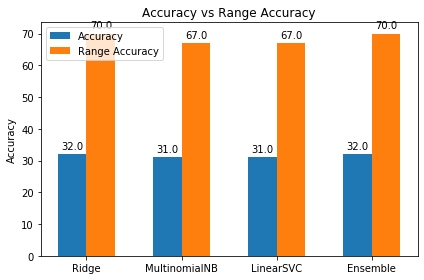

In [170]:
labels = ['Ridge', 'MultinomialNB', 'LinearSVC', 'Ensemble']
accuracy = np.round([acc*100, acc2*100, acc3*100, acc4*100])
range_accuracy = np.round([range_ridge_score, range_MNB_score, range_svc_score, range_ensemble_score])

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, range_accuracy, width, label='Range Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Range Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

Based on the results of the above bar graph, the Web UI was developed with the Ridge Classifier for predicting the rating.

Save the models using joblib 

In [35]:
from sklearn.externals import joblib
joblib.dump(clf, 'ridge_model.sav')
joblib.dump(count_vectorizer, 'vector.sav')
joblib.dump(clf2, 'multi_naive_bayes.sav')
joblib.dump(clf3, 'linear_SVC.sav')

C:\Users\perei\miniconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['linear_SVC.sav']

References:<br><ul>
    <li>https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/</li>
    <li>https://www.kaggle.com/jvanelteren/boardgamegeek-reviews</li>
    <li>https://www.boardgamegeek.com/</li>
    <li>https://github.com/vivekk09/Board-Game-Review-Prediction-ML-Project/blob/master/Board%20Game%20Review%20Prediction.ipynb</li>
    <li>https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a</li>
    <li>https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py</li>
        <li>https://blog.statsbot.co/ensemble-learning-d1dcd548e936</li>